<a href="https://colab.research.google.com/github/armand010/PembMesin_Ganjil_2024/blob/main/Week4_Tugas2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Buatlah model klasifikasi dengan menggunakan SVM berdasarkan data pada Percobaan 5 dengan menggunakan fitur histogram.

Shape	: (591, 800, 3)
Label	: night


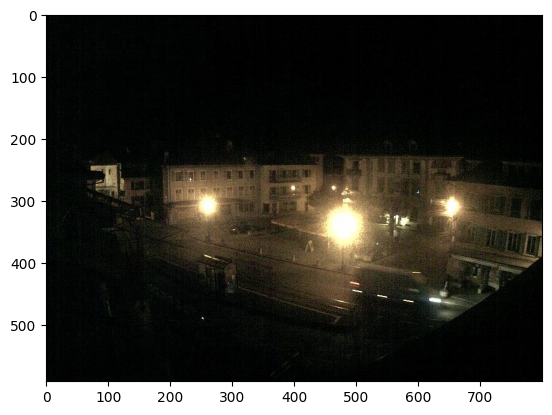

In [2]:
from pathlib import Path
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import random
import numpy as np
import pandas as pd

train_dir = "/content/drive/MyDrive/Machine Learning SMT 5/images/training"
test_dir = "/content/drive/MyDrive/Machine Learning SMT 5/images/test"

def load_dataset(img_dir):
    p = Path(img_dir)
    dirs = p.glob('*')

    img_list = []

    for dir in dirs:
        label = str(dir).split('/')[-1]
        for file in dir.glob('*.jpg'):
            img = mpimg.imread(file)

            if not img is None:
                img_list.append((img, label))

    return img_list

train_img = load_dataset(train_dir)

# Function to Visualize
def random_img_viz(img_list):
    rand_num = np.random.randint(0, len(img_list))

    img = img_list[rand_num][0]
    label = img_list[rand_num][1]
    label_str = 'day' if label == 1 else 'night'

    plt.imshow(img)
    print(f'Shape\t: {img.shape}')
    print(f'Label\t: {label}')

random_img_viz(train_img)

Shape	: (600, 1100, 3)
Label	: 0


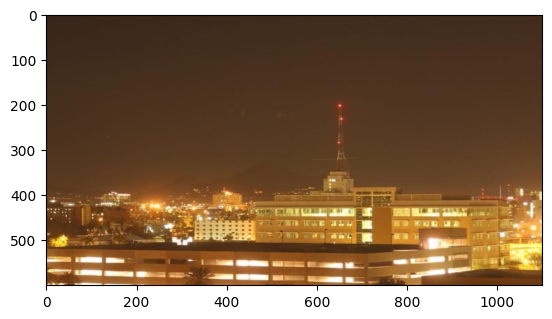

In [3]:
def standarized_input(image):
    std_img = cv2.resize(image, (1100,600))

    return std_img

def label_encoder(label):
    # Encode the label
    # day as 1; night as 0
    num_val = 0

    if(label == 'day'):
        num_val = 1

    return num_val

def preprocess(img_list):
    std_img_list = []

    for item in img_list:
        image = item[0]
        label = item[1]

        # Standarized the image
        std_img = standarized_input(image)

        # Create the label
        img_label = label_encoder(label)

        std_img_list.append((std_img, img_label))

    return std_img_list

train_std_img_list = preprocess(train_img)

random_img_viz(train_std_img_list)

Akurasi: 98.12%

Laporan Klasifikasi:
              precision    recall  f1-score   support

       night       0.99      0.97      0.98        80
         day       0.98      0.99      0.98        80

    accuracy                           0.98       160
   macro avg       0.98      0.98      0.98       160
weighted avg       0.98      0.98      0.98       160

Label Asli	: day
Label Prediksi	: day


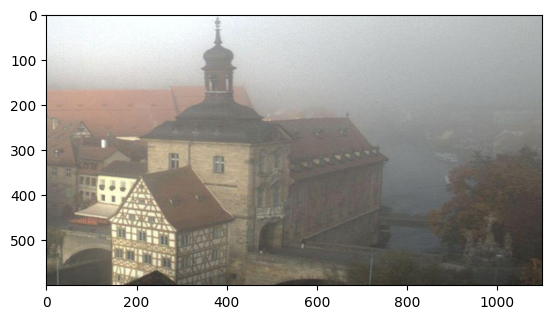

In [4]:
# Fungsi untuk mengekstrak fitur histogram dari gambar
def extract_histogram(image, bins=32):
    # Mengubah gambar ke dalam ruang warna HSV (berguna untuk ekstraksi fitur berbasis warna)
    hsv_img = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    # Menghitung histogram untuk setiap channel (H, S, V) dan menormalisasi
    hist_h = cv2.calcHist([hsv_img], [0], None, [bins], [0, 256])
    hist_s = cv2.calcHist([hsv_img], [1], None, [bins], [0, 256])
    hist_v = cv2.calcHist([hsv_img], [2], None, [bins], [0, 256])

    # Normalisasi histogram
    hist_h = cv2.normalize(hist_h, hist_h).flatten()
    hist_s = cv2.normalize(hist_s, hist_s).flatten()
    hist_v = cv2.normalize(hist_v, hist_v).flatten()

    # Menggabungkan histogram dari ketiga channel menjadi satu vektor fitur
    hist_features = np.concatenate([hist_h, hist_s, hist_v])

    return hist_features

# Fungsi untuk memproses daftar gambar dan mengekstrak fitur serta labelnya
def extract_features_and_labels(img_list, bins=32):
    features = []  # Menyimpan fitur dari gambar
    labels = []    # Menyimpan label dari gambar

    for item in img_list:
        image = item[0]
        label = item[1]

        # Ekstraksi fitur histogram dari gambar
        hist_features = extract_histogram(image, bins=bins)

        # Menambahkan fitur dan label ke daftar
        features.append(hist_features)
        labels.append(label)

    return np.array(features), np.array(labels)

# Ekstraksi fitur dan label untuk data latih
X_train, y_train = extract_features_and_labels(train_std_img_list)

# Memuat dataset pengujian
test_img = load_dataset(test_dir)
test_std_img_list = preprocess(test_img)

# Ekstraksi fitur dan label untuk data uji
X_test, y_test = extract_features_and_labels(test_std_img_list)

# Import library SVM dan evaluasi
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

# Standarisasi fitur (agar distribusi data seimbang)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Melatih model SVM dengan kernel RBF dan parameter C=100
svm_model = SVC(kernel='rbf', C=100)
svm_model.fit(X_train_scaled, y_train)

# Melakukan prediksi pada set data uji
y_pred = svm_model.predict(X_test_scaled)

# Evaluasi model dengan menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi: {accuracy * 100:.2f}%')

# Menampilkan laporan klasifikasi (classification report)
report = classification_report(y_test, y_pred, target_names=['night', 'day'])
print("\nLaporan Klasifikasi:")
print(report)

# Fungsi untuk visualisasi gambar uji acak dengan prediksi
def random_test_img_viz(img_list, predictions):
    rand_num = np.random.randint(0, len(img_list))  # Memilih gambar secara acak

    img = img_list[rand_num][0]
    actual_label = img_list[rand_num][1]
    predicted_label = predictions[rand_num]

    actual_str = 'day' if actual_label == 1 else 'night'
    predicted_str = 'day' if predicted_label == 1 else 'night'

    plt.imshow(img)
    print(f'Label Asli\t: {actual_str}')
    print(f'Label Prediksi\t: {predicted_str}')

# Visualisasi gambar uji acak dengan prediksi
random_test_img_viz(test_std_img_list, y_pred)